In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler as scaler



---
# **Kmeans Model**

In [31]:
class Kmeans:
    def __init__(self, n_clusters = 3, max_iters = 100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X, need_inertia = False):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):

            self.labels = self._assign_labels(X)

            new_centeroids = self._update_centeroids(X,self.labels)

            if np.all(new_centeroids == self.centroids):
                break

            self.centroids = new_centeroids
        
        if need_inertia:
            return self._inertia(X)
        
    def _inertia(self, X):
        X_centroids = np.array([self.centroids[label] for label in self.labels])
        return np.sum((X_centroids - X)**2)
        
    def _assign_labels(self, X):
        labels = []

        for x in X:
            dist = [np.linalg.norm(x_ - x) for x_ in self.centroids]
            labels.append(np.argmin(dist))
        
        return np.array(labels)
    
    def _update_centeroids(self, X, labels):
        new_centroids = []

        for i in range(self.n_clusters):
            cluster_points = X[labels==i]
            new_centroid = cluster_points.mean(axis = 0)
            new_centroids.append(new_centroid)
        
        return np.array(new_centroids)

---
## **Usage Code**

In [32]:
def dataloader():

    df = pd.read_csv('../data/Mall_Customers.csv')
    # Considering only two features 'Annual Income' and 'Spending Score' for better cluster visualization 
    df = df.iloc[:,[3,4]] 
    return df

def preprocessor(df):
    return scaler().fit_transform(df)

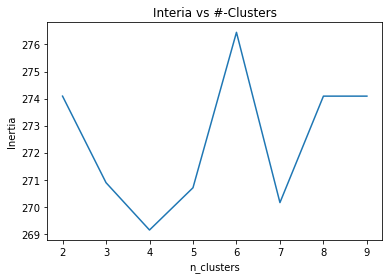

In [34]:
# Figuring out number of clusters using elbow method.

X = preprocessor(dataloader())

inertia_list = []
for n_clusters in np.arange(2,10):
    kmeans = Kmeans(n_clusters=2)
    inertia_list.append(kmeans.fit(X, need_inertia=True))

plt.plot(np.arange(2,10), inertia_list)
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.title('Interia vs #-Clusters')
plt.show()

In [35]:
kmeans = Kmeans(n_clusters=4)
kmeans.fit(X)

labels = kmeans.labels
centeroids = kmeans.centroids

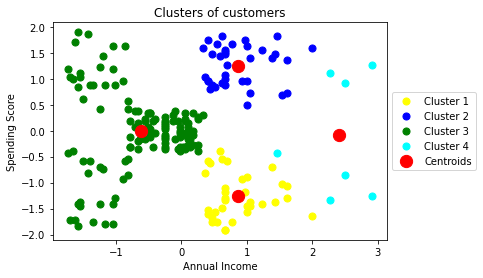

In [43]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(centeroids[:, 0], centeroids[:, 1], s = 150, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()